In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметри Варіанта 12
a, b, c = 0.3, 0.8, 0.4
eta_user = 0.9

# Матриця автокореляції R (Rx) та вектор взаємної кореляції p (rxd)
R = np.array([[1.0, c], 
              [c, 1.0]])
p = np.array([[a], 
              [b]])

sigma_sq = 1.0 # Константа, що не впливає на положення мінімуму

In [32]:
# Розрахунок за формулою w* = R^-1 * p
w_star = np.linalg.inv(R) @ p

print("--- Аналітичне рішення ---")
print(f"Оптимальні ваги w*: \n{w_star}")

--- Аналітичне рішення ---
Оптимальні ваги w*: 
[[-0.02380952]
 [ 0.80952381]]


In [33]:
# Знаходимо власні числа
eigvals = np.linalg.eigvals(R)
l_max = max(eigvals)
l_min = min(eigvals)

# Умова збіжності: 0 < eta < 2/lambda_max
eta_crit = 2 / l_max
# Швидкість: відношення min/max
speed_ratio = l_min / l_max

print("--- Аналіз збіжності (Урок U-6) ---")
print(f"Власні числа: {eigvals}")
print(f"Критичне значення eta_crit: {eta_crit:.4f}")
print(f"Чи збігається eta={eta_user}?  {'Так' if eta_user < eta_crit else 'Ні'}")
print(f"Показник швидкості (l_min/l_max): {speed_ratio:.4f}")

--- Аналіз збіжності (Урок U-6) ---
Власні числа: [1.4 0.6]
Критичне значення eta_crit: 1.4286
Чи збігається eta=0.9?  Так
Показник швидкості (l_min/l_max): 0.4286


In [34]:
def get_energy(w):
    # w має бути формою (2,1)
    return 0.5 * sigma_sq - p.T @ w + 0.5 * w.T @ R @ w

def get_gradient(w):
    # Згідно з U-6: градієнт (напрямок) це p - Rw
    # Ми використовуємо його для оновлення: w(k+1) = w(k) + eta * (p - Rw)
    return p - R @ w

In [35]:
# Простий Градієнтний Спуск (Simple GD)
def simple_gradient_descent(eta, iterations=10000):
    w = np.array([[0.0], [0.0]]) # Початкова точка
    history = [w.flatten()]
    
    for _ in range(iterations):
        grad_step = get_gradient(w)
        w = w + eta * grad_step # Крок у бік градієнта (LMS form) 
        history.append(w.flatten())
        
    return np.array(history)

# Запуск
history_gd = simple_gradient_descent(eta_user)

In [36]:
def adam_optimizer(eta=0.01, beta1=0.9, beta2=0.999, eps=1e-8, iterations=100):
    w = np.array([[0.0], [0.0]])
    m = np.zeros_like(w)
    v = np.zeros_like(w)
    history = [w.flatten()]
    
    for t in range(1, iterations + 1):
        g = -(get_gradient(w)) # стандартний градієнт для мінімізації
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g**2)
        
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        
        w = w - eta * m_hat / (np.sqrt(v_hat) + eps)
        history.append(w.flatten())
    return np.array(history)

# Місце для інших методів (RMSProp, Adagrad тощо):
# def rmsprop(...):
#     ...

C:\Users\Felix\AppData\Local\Temp\ipykernel_1592\1812935970.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = get_energy(np.array([[X[i,j]], [Y[i,j]]]))


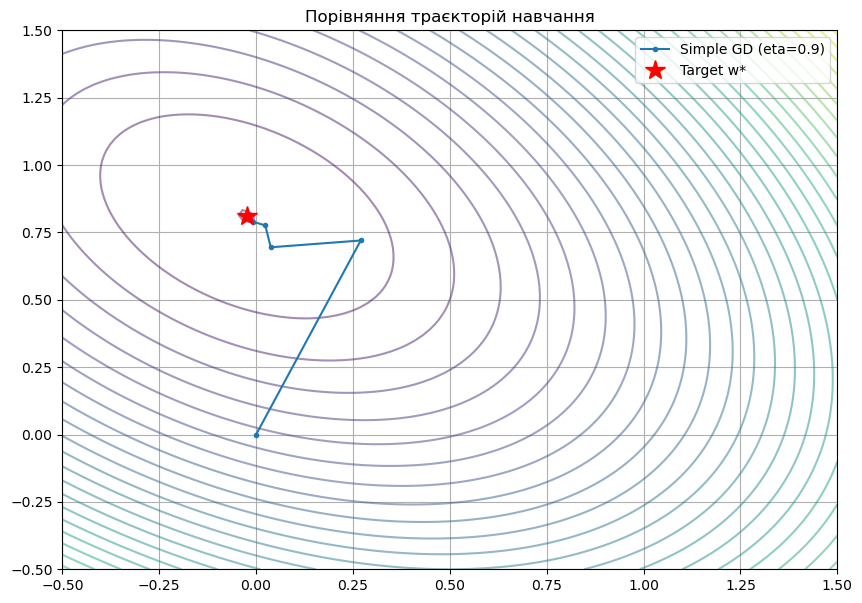

In [37]:
def plot_results(histories, labels):
    plt.figure(figsize=(10, 7))
    
    # Створення сітки для ліній рівня
    x = np.linspace(-0.5, 1.5, 100)
    y = np.linspace(-0.5, 1.5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(100):
        for j in range(100):
            Z[i,j] = get_energy(np.array([[X[i,j]], [Y[i,j]]]))

    plt.contour(X, Y, Z, levels=30, cmap='viridis', alpha=0.5)
    
    for h, l in zip(histories, labels):
        plt.plot(h[:, 0], h[:, 1], '-o', label=l, markersize=3)
    
    plt.plot(w_star[0], w_star[1], 'r*', markersize=15, label='Target w*')
    plt.legend()
    plt.title("Порівняння траєкторій навчання")
    plt.grid(True)
    plt.show()

# Виклик візуалізації
plot_results([history_gd], ["Simple GD (eta=0.9)"])

<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Felix\AppData\Local\Temp\ipykernel_1592\790492246.py:8: SyntaxWarning: invalid escape sequence '\e'
  labels=["Simple GD ($\eta=0.9$)", "Adam ($\eta=0.1$)"]
C:\Users\Felix\AppData\Local\Temp\ipykernel_1592\790492246.py:8: SyntaxWarning: invalid escape sequence '\e'
  labels=["Simple GD ($\eta=0.9$)", "Adam ($\eta=0.1$)"]
C:\Users\Felix\AppData\Local\Temp\ipykernel_1592\1812935970.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = get_energy(np.array([[X[i,j]], [Y[i,j]]]))


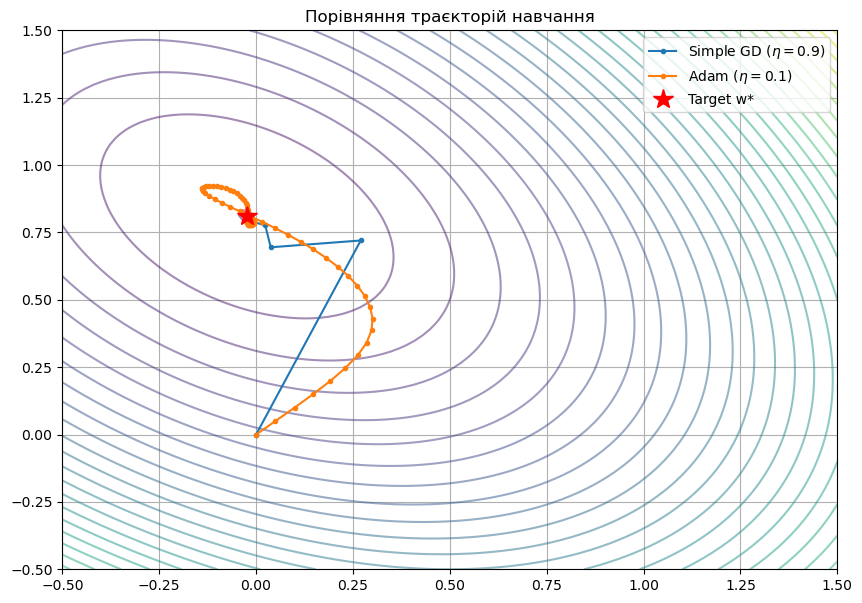

In [50]:
# 1. Отримуємо історію для Adam (якщо ще не зроблено)
# Рекомендується eta=0.1 для стабільного навчання в Adam
history_adam = adam_optimizer(eta=0.05, iterations=1000)

# 2. Оновлений виклик візуалізації для 2D
plot_results(
    histories=[history_gd, history_adam], 
    labels=["Simple GD ($\eta=0.9$)", "Adam ($\eta=0.1$)"]
)

C:\Users\Felix\AppData\Local\Temp\ipykernel_1592\2892113116.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = get_energy(w_ij)


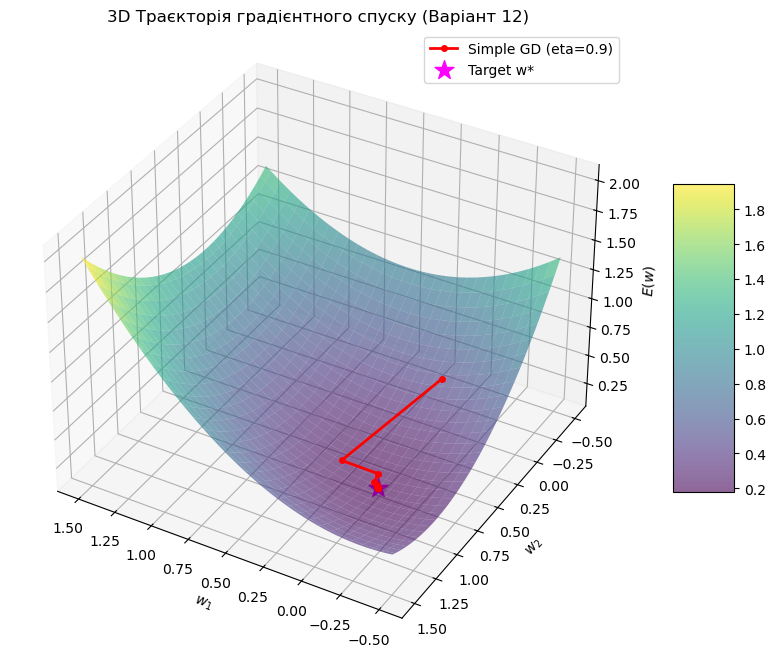

In [51]:
def plot_results_3d(histories, labels):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 1. Створення сітки для поверхні енергії E(w)
    # Розширимо межі, щоб краще бачити "чашу"
    x = np.linspace(-0.5, 1.5, 60)
    y = np.linspace(-0.5, 1.5, 60)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    
    for i in range(len(x)):
        for j in range(len(y)):
            w_ij = np.array([[X[i,j]], [Y[i,j]]])
            # Енергія згідно з формулою: 0.5*sigma^2 - p.T*w + 0.5*w.T*R*w
            Z[i,j] = get_energy(w_ij)

    # Малюємо поверхню (чашу)
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')
    
    # 2. Малюємо траєкторії навчання
    colors = ['red', 'blue', 'green', 'orange']
    for idx, (h, l) in enumerate(zip(histories, labels)):
        # Розраховуємо значення енергії для кожної точки траєкторії
        h_energy = [get_energy(np.array([[step[0]], [step[1]]])).item() for step in h]
        
        # Малюємо лінію спуску (трішки вище поверхні для видимості)
        ax.plot(h[:, 0], h[:, 1], h_energy, '-o', label=l, 
                color=colors[idx % len(colors)], markersize=4, linewidth=2, zorder=10)

    # 3. Позначаємо ціль w* (дно чаші)
    w_star_energy = get_energy(w_star).item()
    ax.scatter(w_star[0], w_star[1], w_star_energy, color='magenta', s=200, marker='*', label='Target w*', zorder=15)

    # Налаштування вигляду
    ax.set_xlabel('$w_1$')
    ax.set_ylabel('$w_2$')
    ax.set_zlabel('$E(w)$')
    ax.set_title("3D Траєкторія градієнтного спуску (Варіант 12)")
    ax.legend()
    
    # Можна змінити кут огляду для кращого ефекту
    ax.view_init(elev=35, azim=120)
    
    plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    plt.show()

# Виклик нової 3D візуалізації
# Можеш додати сюди інші історії, коли реалізуєш адаптивні методи
plot_results_3d([history_gd], ["Simple GD (eta=0.9)"])

C:\Users\Felix\AppData\Local\Temp\ipykernel_1592\2892113116.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = get_energy(w_ij)


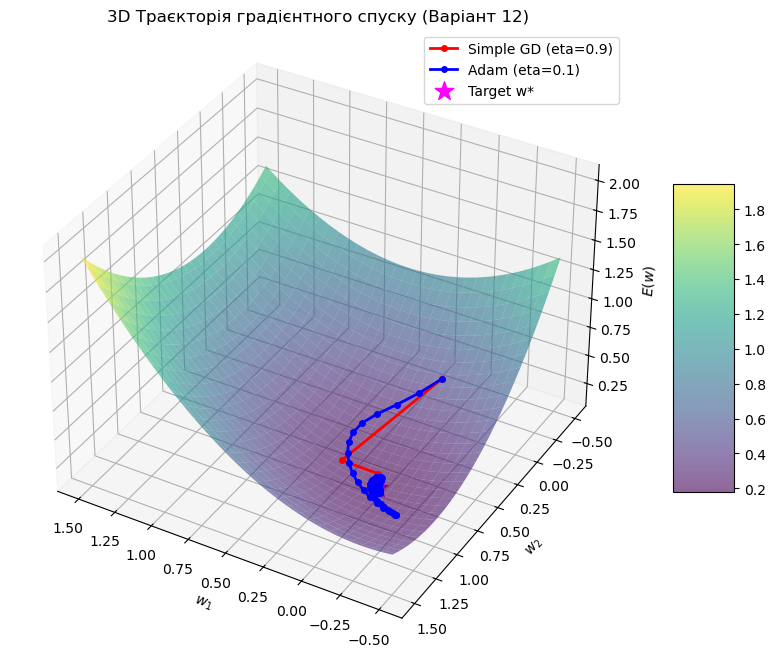

In [53]:
# 1. Запускаємо Adam
# Для Adam зазвичай ставлять менший eta (наприклад, 0.1 або 0.05), 
# оскільки він сам прискорюється за рахунок моментів.
history_adam = adam_optimizer(eta=0.1, iterations=100)

# 2. Викликаємо 3D візуалізацію для обох методів
# Передаємо список історій та список міток (labels)
plot_results_3d(
    histories=[history_gd, history_adam], 
    labels=["Simple GD (eta=0.9)", "Adam (eta=0.1)"]
)

In [54]:
def get_std_gradient(w):
    # Стандартний градієнт для мінімізації: grad = Rw - p
    return R @ w - p

# 1. Gradient Descent with Momentum
def momentum_gd(eta=0.1, gamma=0.9, iterations=100):
    w = np.array([[0.0], [0.0]])
    v = np.zeros_like(w)
    history = [w.flatten()]
    for _ in range(iterations):
        g = get_std_gradient(w)
        v = gamma * v + eta * g
        w = w - v
        history.append(w.flatten())
    return np.array(history)

# 2. Adagrad
def adagrad(eta=0.5, eps=1e-8, iterations=100):
    w = np.array([[0.0], [0.0]])
    G = np.zeros_like(w) # Накопичена сума квадратів градієнтів
    history = [w.flatten()]
    for _ in range(iterations):
        g = get_std_gradient(w)
        G += g**2
        w = w - (eta / np.sqrt(G + eps)) * g
        history.append(w.flatten())
    return np.array(history)

# 3. RMSProp
def rmsprop(eta=0.1, rho=0.9, eps=1e-8, iterations=100):
    w = np.array([[0.0], [0.0]])
    E_g2 = np.zeros_like(w) # Ковзне середнє квадратів градієнтів
    history = [w.flatten()]
    for _ in range(iterations):
        g = get_std_gradient(w)
        E_g2 = rho * E_g2 + (1 - rho) * (g**2)
        w = w - (eta / np.sqrt(E_g2 + eps)) * g
        history.append(w.flatten())
    return np.array(history)

# 4. Adadelta
def adadelta(rho=0.95, eps=1e-6, iterations=100):
    w = np.array([[0.0], [0.0]])
    E_g2 = np.zeros_like(w)
    E_dw2 = np.zeros_like(w) # Ковзне середнє квадратів оновлень ваг
    history = [w.flatten()]
    for _ in range(iterations):
        g = get_std_gradient(w)
        E_g2 = rho * E_g2 + (1 - rho) * (g**2)
        # Розрахунок кроку (замість eta використовується RMS оновлень)
        dw = -(np.sqrt(E_dw2 + eps) / np.sqrt(E_g2 + eps)) * g
        w = w + dw
        E_dw2 = rho * E_dw2 + (1 - rho) * (dw**2)
        history.append(w.flatten())
    return np.array(history)

# 5. AdaMax (варіант Adam на основі інфінітної норми)
def adamax(eta=0.1, beta1=0.9, beta2=0.999, iterations=100):
    w = np.array([[0.0], [0.0]])
    m = np.zeros_like(w)
    u = np.zeros_like(w) # Накопичення максимуму
    history = [w.flatten()]
    for t in range(1, iterations + 1):
        g = get_std_gradient(w)
        m = beta1 * m + (1 - beta1) * g
        u = np.maximum(beta2 * u, np.abs(g))
        m_hat = m / (1 - beta1**t)
        w = w - (eta / (u + 1e-8)) * m_hat
        history.append(w.flatten())
    return np.array(history)

In [55]:
# Налаштування кількості ітерацій
iters = 80

hist_gd = simple_gradient_descent(eta=0.9, iterations=iters)
hist_momentum = momentum_gd(eta=0.1, iterations=iters)
hist_adagrad = adagrad(eta=0.5, iterations=iters)
hist_rmsprop = rmsprop(eta=0.1, iterations=iters)
hist_adadelta = adadelta(iterations=iters)
hist_adam = adam_optimizer(eta=0.1, iterations=iters)
hist_adamax = adamax(eta=0.1, iterations=iters)

# Списки для візуалізації
all_histories = [hist_gd, hist_momentum, hist_adagrad, hist_rmsprop, hist_adadelta, hist_adam, hist_adamax]
all_labels = ["GD", "Momentum", "Adagrad", "RMSProp", "Adadelta", "Adam", "AdaMax"]

C:\Users\Felix\AppData\Local\Temp\ipykernel_1592\1812935970.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = get_energy(np.array([[X[i,j]], [Y[i,j]]]))


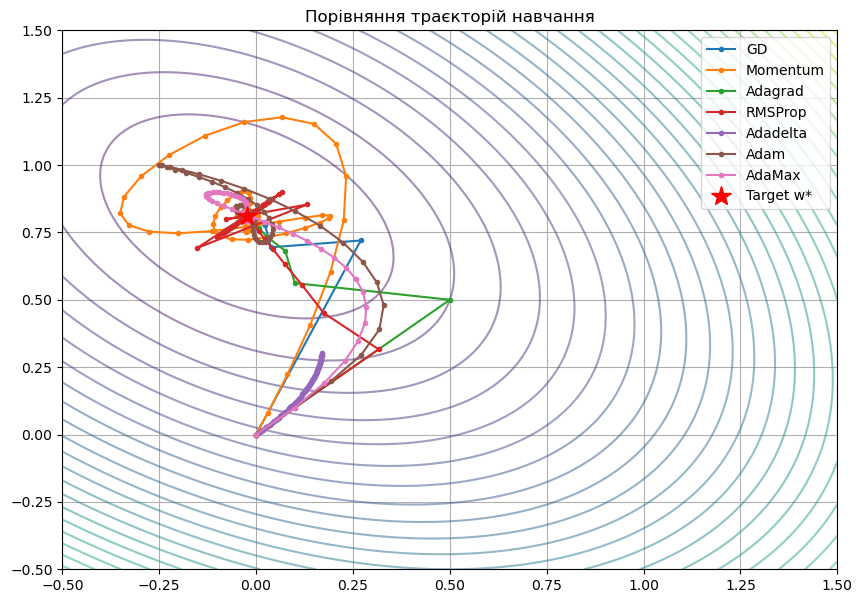

C:\Users\Felix\AppData\Local\Temp\ipykernel_1592\2892113116.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = get_energy(w_ij)


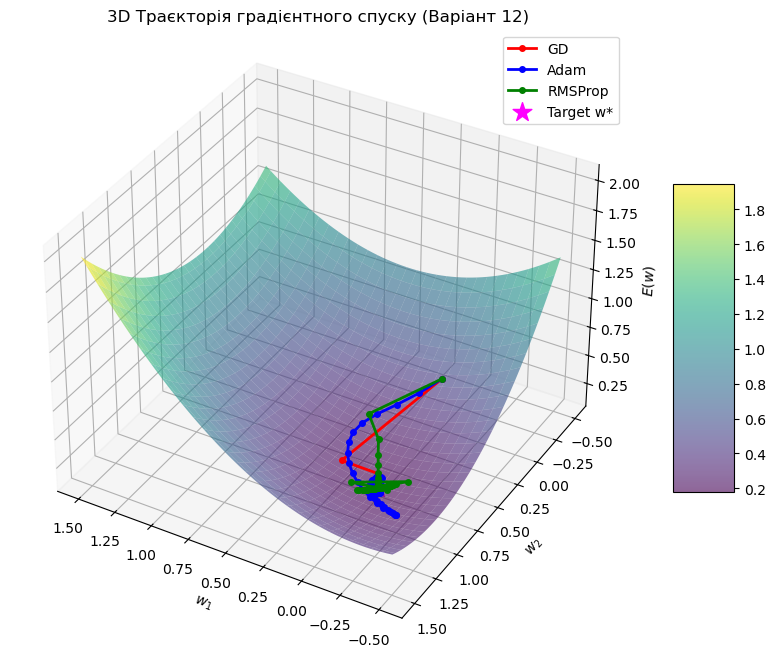

In [56]:
# 2D порівняння
plot_results(all_histories, all_labels)

# 3D порівняння (може бути занадто багато ліній, краще вибирати 2-3 для порівняння)
plot_results_3d([hist_gd, hist_adam, hist_rmsprop], ["GD", "Adam", "RMSProp"])

In [57]:
import pandas as pd

# Визначаємо цільову точність (tolerance)
TOLERANCE = 1e-4
MAX_ITER = 2000

def get_comparison_table():
    results = []
    
    # Список функцій та їх параметрів для тесту
    # (Використовуємо функції, реалізовані раніше)
    optimizers = [
        ("Simple GD", lambda: simple_gradient_descent(eta=0.9, iterations=MAX_ITER)),
        ("Momentum", lambda: momentum_gd(eta=0.1, gamma=0.9, iterations=MAX_ITER)),
        ("Adagrad", lambda: adagrad(eta=0.5, iterations=MAX_ITER)),
        ("RMSProp", lambda: rmsprop(eta=0.1, iterations=MAX_ITER)),
        ("Adadelta", lambda: adadelta(iterations=MAX_ITER)),
        ("Adam", lambda: adam_optimizer(eta=0.1, iterations=MAX_ITER)),
        ("AdaMax", lambda: adamax(eta=0.1, iterations=MAX_ITER))
    ]

    for name, opt_func in optimizers:
        history = opt_func()
        
        # Знаходимо, на якій ітерації ми підійшли до w* ближче ніж на TOLERANCE
        iterations_to_converge = None
        final_error = None
        
        for i, w_vec in enumerate(history):
            # Помилка: відстань від поточної точки до ідеальної w*
            error = np.linalg.norm(w_vec.reshape(2,1) - w_star)
            
            if iterations_to_converge is None and error < TOLERANCE:
                iterations_to_converge = i
            
            final_error = error
        
        results.append({
            "Алгоритм": name,
            "Ітерацій до збіжності": iterations_to_converge if iterations_to_converge is not None else f">{MAX_ITER}",
            "Фінальна помилка": f"{final_error:.6f}",
            "Фінальні ваги w1": f"{history[-1][0]:.4f}",
            "Фінальні ваги w2": f"{history[-1][1]:.4f}"
        })

    # Створюємо DataFrame
    df = pd.DataFrame(results)
    return df

# Вивід таблиці
comparison_df = get_comparison_table()
print(f"Оптимальне рішення w*: {w_star.flatten()}")
comparison_df

Оптимальне рішення w*: [-0.02380952  0.80952381]


,Алгоритм,Ітерацій до збіжності,Фінальна помилка,Фінальні ваги w1,Фінальні ваги w2
0,Simple GD,12,0.000000,-0.0238,0.8095
1,Momentum,159,0.000000,-0.0238,0.8095
2,Adagrad,17,0.000000,-0.0238,0.8095
3,RMSProp,18,0.070711,-0.0738,0.7595
4,Adadelta,423,0.000000,-0.0238,0.8095
5,Adam,141,0.000000,-0.0238,0.8095
6,AdaMax,148,0.000000,-0.0238,0.8095
